## ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

ÏàòÏùµ Ï¶ùÎåÄÎ•º ÏúÑÌïú ÎßàÏºÄÌåÖ Í¥ÄÏ†êÏóêÏÑú Í≥†Í∞ùÏùÑ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ìï† Ïàò ÏûàÎäî ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±

1. ÌèâÍ∑† Ìï†Ïù∏Ïú®
2. Íµ¨Îß§ Ïπ¥ÌÖåÍ≥†Î¶¨ Îã§ÏñëÏÑ±
3. Total_ÏàòÎüâ(Í≥†Í∞ùÎ≥Ñ Ï†ÑÏ≤¥ Ï†úÌíà Íµ¨Îß§ÏàòÎüâ)
4. Average_Unit_Price(Í≥†Í∞ùÎ≥Ñ Ï†úÌíàÎãπ ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°)
5. Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®
6. Ï£ºÎßê_Í±∞Îûò(Onlinesale_info.csvÏóê ÎÇ†Ïßú Ïª¨ÎüºÏùÑ ÏöîÏùºÍ≥º Îß§Ïπ≠ÏãúÏºú Ï£ºÎßê(ÌÜ†~Ïùº)Ïùò Í±∞ÎûòÍ±¥Ïàò Ï¥ùÌï©)
7. ÌèâÏùº_Í±∞Îûò(Onlinesale_info.csvÏóê ÎÇ†Ïßú Ïª¨ÎüºÏùÑ ÏöîÏùºÍ≥º Îß§Ïπ≠ÏãúÏºú ÌèâÏùº(Ïõî~Í∏à)Ïùò Í±∞ÎûòÍ±¥Ïàò Ï¥ùÌï©)
8. Í≥†Í∞ÄÏ†úÌíà Íµ¨Îß§Ïú®

In [11]:
import pandas as pd

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
customer_df = pd.read_csv(r"C:\Users\Jimin\Desktop\project\ecommerce\raw\Customer_info.csv")
discount_df = pd.read_csv(r"C:\Users\Jimin\Desktop\project\ecommerce\raw\Discount_info.csv")
onlinesales_df = pd.read_csv(r"C:\Users\Jimin\Desktop\project\ecommerce\raw\Onlinesales_info.csv")

# 2. onlinesales_df Ï†ÑÏ≤òÎ¶¨: ÎÇ†Ïßú Ïª¨Îüº Ï≤òÎ¶¨
onlinesales_df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(onlinesales_df['Í±∞ÎûòÎÇ†Ïßú'])
# Ìï†Ïù∏Ï†ïÎ≥¥ Î≥ëÌï©Ïóê ÌïÑÏöîÌïú Ïõî Ï∂îÏ∂ú (Ïòà: Jan, Feb Îì±)
onlinesales_df['Ïõî'] = onlinesales_df['Í±∞ÎûòÎÇ†Ïßú'].dt.strftime('%b')
# ÏöîÏùº Ï†ïÎ≥¥ (Ïõî~Ïùº: 0~6; Ï£ºÎßêÏùÄ 5,6)
onlinesales_df['Í±∞ÎûòÏöîÏùº'] = onlinesales_df['Í±∞ÎûòÎÇ†Ïßú'].dt.dayofweek

# 3. ÌååÏÉùÎ≥ÄÏàò 1: ÌèâÍ∑† Ìï†Ïù∏Ïú®
# Ìï†Ïù∏_dfÏôÄ onlinesales_dfÎ•º (Ïõî, Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨) Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
onlinesales_with_discount = pd.merge(onlinesales_df, discount_df, on=['Ïõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'], how='left')
# Í≥†Í∞ùÎ≥Ñ Ìï†Ïù∏Ïú® ÌèâÍ∑† Í≥ÑÏÇ∞
avg_discount_df = onlinesales_with_discount.groupby('Í≥†Í∞ùID')['Ìï†Ïù∏Ïú®'].mean().reset_index()
avg_discount_df.rename(columns={'Ìï†Ïù∏Ïú®': 'ÌèâÍ∑†Ìï†Ïù∏Ïú®'}, inplace=True)
# Ìï†Ïù∏Ïú® Í≤∞Ï∏°Ïπò (Ìï†Ïù∏Ï†ïÎ≥¥Í∞Ä ÏóÜÎäî Í±∞Îûò)Îäî 0ÏúºÎ°ú Ï≤òÎ¶¨
avg_discount_df['ÌèâÍ∑†Ìï†Ïù∏Ïú®'] = avg_discount_df['ÌèâÍ∑†Ìï†Ïù∏Ïú®'].fillna(0)

# 4. ÌååÏÉùÎ≥ÄÏàò 2: Íµ¨Îß§ Ïπ¥ÌÖåÍ≥†Î¶¨ Îã§ÏñëÏÑ±
# Í≥†Í∞ùÎ≥Ñ Íµ¨Îß§Ìïú Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨Ïùò Í≥†Ïú† Í∞úÏàò Í≥ÑÏÇ∞
cat_diversity_df = onlinesales_df.groupby('Í≥†Í∞ùID')['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'].nunique().reset_index()
cat_diversity_df.rename(columns={'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨': 'Íµ¨Îß§_Ïπ¥ÌÖåÍ≥†Î¶¨_Îã§ÏñëÏÑ±'}, inplace=True)

# 5. ÌååÏÉùÎ≥ÄÏàò 3: Total_ÏàòÎüâ (Í≥†Í∞ùÎ≥Ñ Ï†ÑÏ≤¥ Íµ¨Îß§ÏàòÎüâ)
total_quantity_df = onlinesales_df.groupby('Í≥†Í∞ùID')['ÏàòÎüâ'].sum().reset_index()
total_quantity_df.rename(columns={'ÏàòÎüâ': 'Total_ÏàòÎüâ'}, inplace=True)

# 6. ÌååÏÉùÎ≥ÄÏàò 4: Average_Unit_Price (Í≥†Í∞ùÎ≥Ñ Ï†úÌíàÎãπ ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°)
# Îã®, Íµ¨Îß§ Í∏àÏï°Ïù¥ Ï†úÌíàÎ≥Ñ Í∞ÄÍ≤©Ïù¥ÎØÄÎ°ú Í≥†Í∞ùÎ≥Ñ Íµ¨Îß§Ìïú Ï†ÑÏ≤¥ Í∏àÏï°ÏùÑ Ï¥ù ÏàòÎüâÏúºÎ°ú ÎÇòÎàÑÏñ¥ Í≥ÑÏÇ∞ (Í∞ÄÏ§ëÌèâÍ∑†)
avg_unit_price_df = onlinesales_df.groupby('Í≥†Í∞ùID').apply(
    lambda df: (df['ÌèâÍ∑†Í∏àÏï°'] * df['ÏàòÎüâ']).sum() / df['ÏàòÎüâ'].sum()
).reset_index(name='Average_Unit_Price')

# 7. ÌååÏÉùÎ≥ÄÏàò 5: Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®
# Ïø†Ìè∞ÏÉÅÌÉú("Used" vs "Not Used")Î•º 1/0ÏúºÎ°ú Îß§Ìïë ÌõÑ Í≥†Í∞ùÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
onlinesales_df['Ïø†Ìè∞ÏÇ¨Ïö©'] = onlinesales_df['Ïø†Ìè∞ÏÉÅÌÉú'].apply(lambda x: 1 if x == 'Used' else 0)
coupon_usage_df = onlinesales_df.groupby('Í≥†Í∞ùID')['Ïø†Ìè∞ÏÇ¨Ïö©'].mean().reset_index()
coupon_usage_df.rename(columns={'Ïø†Ìè∞ÏÇ¨Ïö©': 'Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®'}, inplace=True)

# 8. ÌååÏÉùÎ≥ÄÏàò 6 & 7: Ï£ºÎßê_Í±∞Îûò Î∞è ÌèâÏùº_Í±∞Îûò
# Ï£ºÎßê: ÌÜ†(5)ÏôÄ Ïùº(6), ÌèâÏùº: Ïõî(0)~Í∏à(4)
weekend_df = onlinesales_df[onlinesales_df['Í±∞ÎûòÏöîÏùº'] >= 5].groupby('Í≥†Í∞ùID').size().reset_index(name='Ï£ºÎßê_Í±∞Îûò')
weekday_df = onlinesales_df[onlinesales_df['Í±∞ÎûòÏöîÏùº'] < 5].groupby('Í≥†Í∞ùID').size().reset_index(name='ÌèâÏùº_Í±∞Îûò')

# 9. ÌååÏÉùÎ≥ÄÏàò 8: Í≥†Í∞ÄÏ†úÌíà Íµ¨Îß§Ïú®
# Ï†ÑÏ≤¥ Í±∞ÎûòÏóêÏÑú 'ÌèâÍ∑†Í∏àÏï°'Ïù¥ ÏÉÅÏúÑ 25% Ïù¥ÏÉÅÏù∏ Ï†úÌíàÏùÑ Í≥†Í∞Ä Ï†úÌíàÏúºÎ°ú Ï†ïÏùò
high_price_threshold = onlinesales_df['ÌèâÍ∑†Í∏àÏï°'].quantile(0.75)
onlinesales_df['Í≥†Í∞ÄÏ†úÌíàÏó¨Î∂Ä'] = onlinesales_df['ÌèâÍ∑†Í∏àÏï°'] > high_price_threshold
# Í≥†Í∞ùÎ≥Ñ Í≥†Í∞Ä Ï†úÌíà Íµ¨Îß§ ÎπÑÏú® Í≥ÑÏÇ∞ (TrueÎ•º 1Î°ú Ï∑®Í∏â)
high_price_df = onlinesales_df.groupby('Í≥†Í∞ùID')['Í≥†Í∞ÄÏ†úÌíàÏó¨Î∂Ä'].mean().reset_index()
high_price_df.rename(columns={'Í≥†Í∞ÄÏ†úÌíàÏó¨Î∂Ä': 'Í≥†Í∞ÄÏ†úÌíàÍµ¨Îß§Ïú®'}, inplace=True)

# 10. customer_dfÏôÄ ÌååÏÉùÎ≥ÄÏàò Î≥ëÌï©
# ÏàúÏ∞®Ï†ÅÏúºÎ°ú Í≥†Í∞ùIDÎ•º Í∏∞Ï§ÄÏúºÎ°ú left merge (Í≥†Í∞ù Í±∞ÎûòÍ∞Ä ÏóÜÎäî Í≤ΩÏö∞ NaNÏùÄ Ïù¥ÌõÑ 0ÏúºÎ°ú Ï≤òÎ¶¨)
derived_dfs = [avg_discount_df, cat_diversity_df, total_quantity_df, 
               avg_unit_price_df, coupon_usage_df, weekend_df, weekday_df, high_price_df]

for df in derived_dfs:
    customer_df = pd.merge(customer_df, df, on='Í≥†Í∞ùID', how='left')

# Í±∞ÎûòÍ∞Ä ÏóÜÎäî Í≥†Í∞ùÏùò ÌååÏÉùÎ≥ÄÏàò Í≤∞Ï∏°ÏπòÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ
fill_cols = ['ÌèâÍ∑†Ìï†Ïù∏Ïú®', 'Íµ¨Îß§_Ïπ¥ÌÖåÍ≥†Î¶¨_Îã§ÏñëÏÑ±', 'Total_ÏàòÎüâ', 
             'Average_Unit_Price', 'Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®', 'Ï£ºÎßê_Í±∞Îûò', 'ÌèâÏùº_Í±∞Îûò', 'Í≥†Í∞ÄÏ†úÌíàÍµ¨Îß§Ïú®']
customer_df[fill_cols] = customer_df[fill_cols].fillna(0)

# ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏
print(customer_df.head())

# Í≤∞Í≥º Ï†ÄÏû•
customer_df.to_csv(r"C:\Users\Jimin\Desktop\project\ecommerce\Ï†ÑÏ≤òÎ¶¨\Customer_ÌååÏÉùÎ≥ÄÏàòÏ∂îÍ∞Ä")


        Í≥†Í∞ùID ÏÑ±Î≥Ñ        Í≥†Í∞ùÏßÄÏó≠  Í∞ÄÏûÖÍ∏∞Í∞Ñ      ÌèâÍ∑†Ìï†Ïù∏Ïú®  Íµ¨Îß§_Ïπ¥ÌÖåÍ≥†Î¶¨_Îã§ÏñëÏÑ±  Total_ÏàòÎüâ  \
0  USER_1358  ÎÇ®     Chicago    12  10.000000           15      1133   
1  USER_0190  ÎÇ®  California    43  22.045455            8       175   
2  USER_0066  ÎÇ®     Chicago    33  15.238095            9       155   
3  USER_0345  Ïó¨  California    30  10.000000            1         1   
4  USER_0683  ÎÇ®  California    49  23.333333            4        15   

   Average_Unit_Price    Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®  Ï£ºÎßê_Í±∞Îûò  ÌèâÏùº_Í±∞Îûò   Í≥†Í∞ÄÏ†úÌíàÍµ¨Îß§Ïú®  
0           30.495499  0.306397   34.0  263.0  0.390572  
1           17.421657  0.409091    0.0   44.0  0.295455  
2           15.235355  0.285714    0.0   42.0  0.095238  
3            1.240000  0.000000    0.0    1.0  0.000000  
4           69.581333  0.333333    1.0    5.0  0.500000  


C:\Users\Jimin\AppData\Local\Temp\ipykernel_19740\4202455121.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_unit_price_df = onlinesales_df.groupby('Í≥†Í∞ùID').apply(


## ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

ÏúÑÏóêÏÑú Ï∂îÍ∞ÄÌïú ÌååÏÉùÎ≥ÄÏàòÍ∞Ä Îì§Ïñ¥ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏Î≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÎπÑÍµê
Î≥ÄÏàòÎäî ÏÉùÏÑ± Í∞ÄÎä•Ìïú Î™®Îì† Î≥ÄÏàò Ï°∞Ìï©Ïùò Ïã§Î£®Ïó£ Í≥ÑÏàòÎ•º Í≥ÑÏÇ∞Ìï¥ Í∑∏Ï§ë Í∞ÄÏû• ÎÜíÏùÄ Ï°∞Ìï©ÏùÑ Ï±ÑÌÉùÌïòÏòÄÏùå.

ÏàúÏÑúÎåÄÎ°ú 
1. Birch
2. K-Medoids
3. K-Means

Ïã§Î£®Ïó£ Í≥ÑÏàò ÎπÑÍµê : K-Means(0.581) > K-Medoids(0.579) > Birch(0.533)

Explained Variance Ratio by PCA: [0.80958295 0.14241392]
Cluster Sizes:
Cluster
1    538
0    519
3    303
2    108
Name: count, dtype: int64


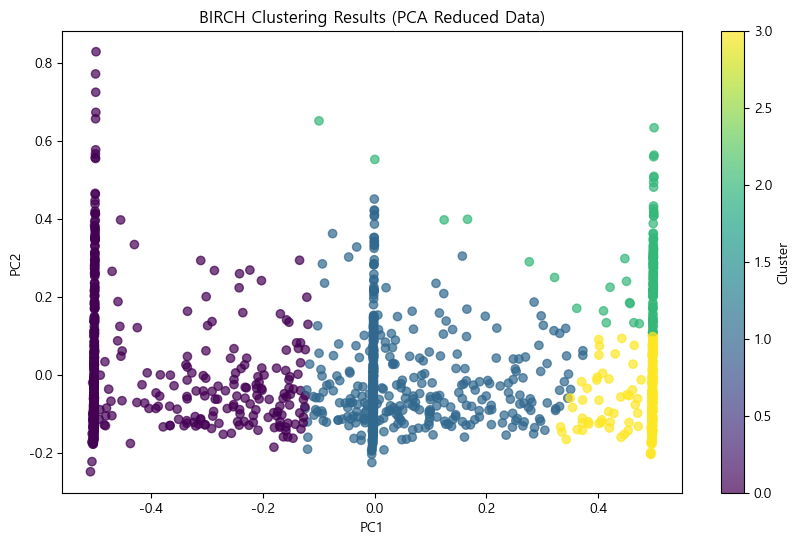

Overall Average Silhouette Score: 0.533
Cluster 0: Average Silhouette Score = 0.463
Cluster 1: Average Silhouette Score = 0.517
Cluster 2: Average Silhouette Score = 0.518
Cluster 3: Average Silhouette Score = 0.687


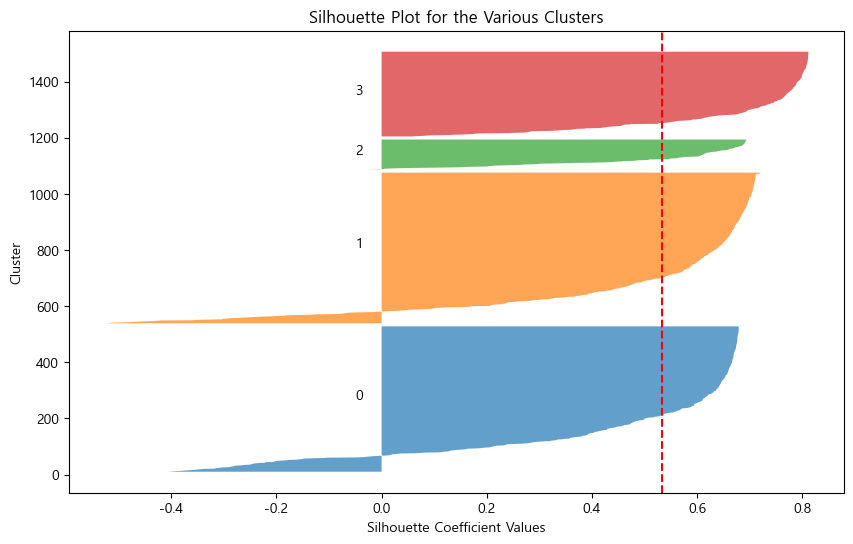


Cluster Summary (Feature Averages):
             ÌèâÍ∑†Ìï†Ïù∏Ïú®  Average_Unit_Price    Total_ÏàòÎüâ    Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®
Cluster                                                     
0        11.541088           37.516022  146.535645  0.717781
1        20.910902           31.386103  219.693309  0.716224
2        29.475741           92.553054   25.685185  0.476048
3        29.743348           22.926778  135.353135  0.753454


<Figure size 1400x800 with 0 Axes>

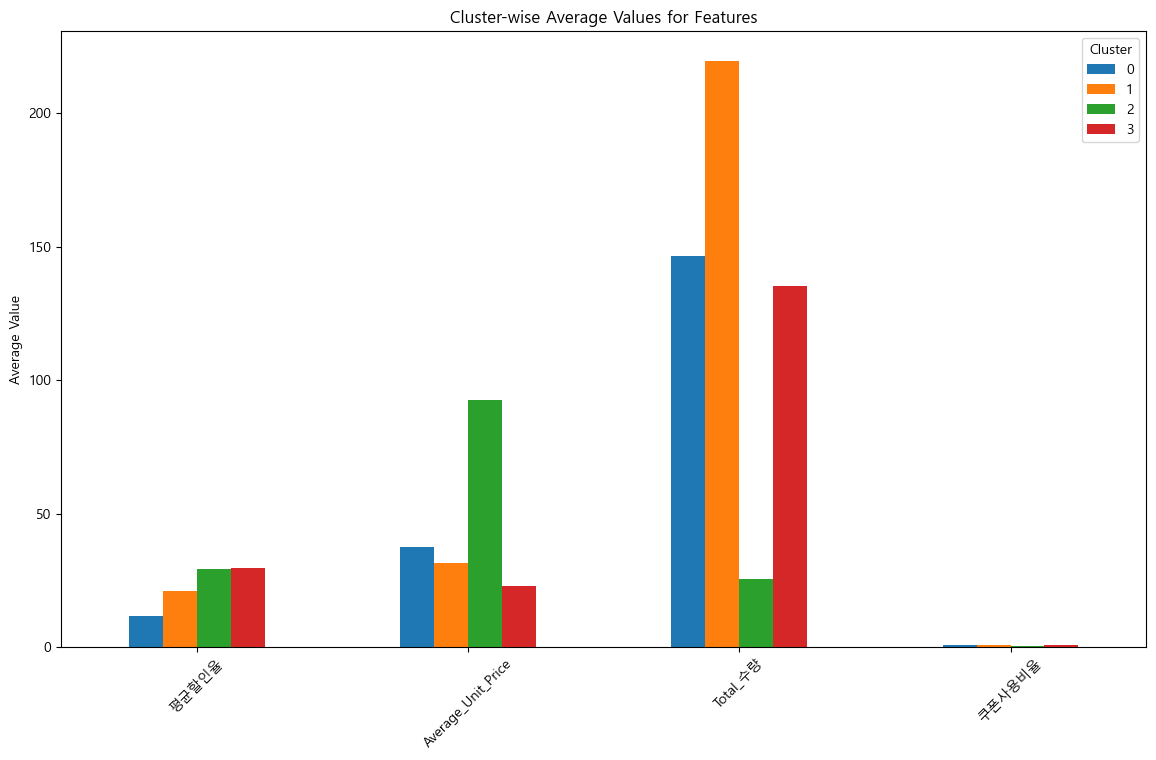

In [42]:
import pandas as pd
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm  
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï 
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False  

# matplotlibÏùò Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic' 

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = r"C:\Users\Jimin\Desktop\project\ecommerce\Ï†ÑÏ≤òÎ¶¨\Customer_ÌååÏÉùÎ≥ÄÏàòÏ∂îÍ∞Ä"
df = pd.read_csv(file_path)

# 2. Ïà´ÏûêÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù
data = df[[ 'ÌèâÍ∑†Ìï†Ïù∏Ïú®', 'Average_Unit_Price', 'Total_ÏàòÎüâ', 'Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®']]

# 3. Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (Min-Max Scaling)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 4. Ï∞®Ïõê Ï∂ïÏÜå (PCA)
pca = PCA(n_components=2)  # 2DÎ°ú Ï∂ïÏÜå
data_pca = pca.fit_transform(data_scaled)

# PCA Í≤∞Í≥º ÌôïÏù∏
print(f"Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}")

# 5. BIRCH ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
birch_model = Birch(threshold=0.28, n_clusters=None)  # threshold Ï°∞Ï†ï Í∞ÄÎä•
df['Cluster'] = birch_model.fit_predict(data_pca)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º ÌôïÏù∏
print("Cluster Sizes:")
print(df['Cluster'].value_counts())

# 6. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('BIRCH Clustering Results (PCA Reduced Data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 10. Ïã§Î£®Ïó£ Í≥ÑÏàò Í≥ÑÏÇ∞
# ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Í∞úÏàòÍ∞Ä 2Í∞ú Ïù¥ÏÉÅÏùº ÎïåÎßå Í≥ÑÏÇ∞ Í∞ÄÎä•
if len(df['Cluster'].unique()) > 1:
    silhouette_avg = silhouette_score(data_pca, df['Cluster'])
    sample_silhouette_values = silhouette_samples(data_pca, df['Cluster'])
    print(f"Overall Average Silhouette Score: {silhouette_avg:.3f}")
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïã§Î£®Ïó£ Í≥ÑÏàò Ï∂úÎ†•
    for cluster in np.unique(df['Cluster']):
        cluster_silhouette = sample_silhouette_values[df['Cluster'] == cluster]
        print(f"Cluster {cluster}: Average Silhouette Score = {np.mean(cluster_silhouette):.3f}")
    
    # Ïã§Î£®Ïó£ Í≥ÑÏàò ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in np.unique(df['Cluster']):
        ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster'] == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title("Silhouette Plot for the Various Clusters")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.show()
else:
    print("Silhouette score cannot be calculated because the number of clusters is less than 2.")


# 7. Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
numeric_columns = data.columns  # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ïó¥ Ïù¥Î¶Ñ
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

print("\nCluster Summary (Feature Averages):")
print(cluster_summary)

# 8. Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†Í∞í ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
cluster_summary.T.plot(kind='bar', figsize=(14, 8))
plt.title('Cluster-wise Average Values for Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()



In [26]:
!pip install pyclustering

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ------------------------ --------------- 1.6/2.6 MB 9.3 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395198 sha256=82c2e3ce55fec2a12a8c872b3b7488856931f492d9151683de44aa03a786a9b5
  Stored in directory: c:\users\jimin\appdata\local\pip\cache\wheels\68\29\b4\131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


DEPRECATION: Loading egg at c:\users\jimin\anaconda3\lib\site-packages\py_hanspell-1.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Explained Variance Ratio by PCA: [0.80958295 0.14241392]
Cluster Sizes:
Cluster
3.0    562
0.0    457
2.0    334
1.0    115
Name: count, dtype: int64


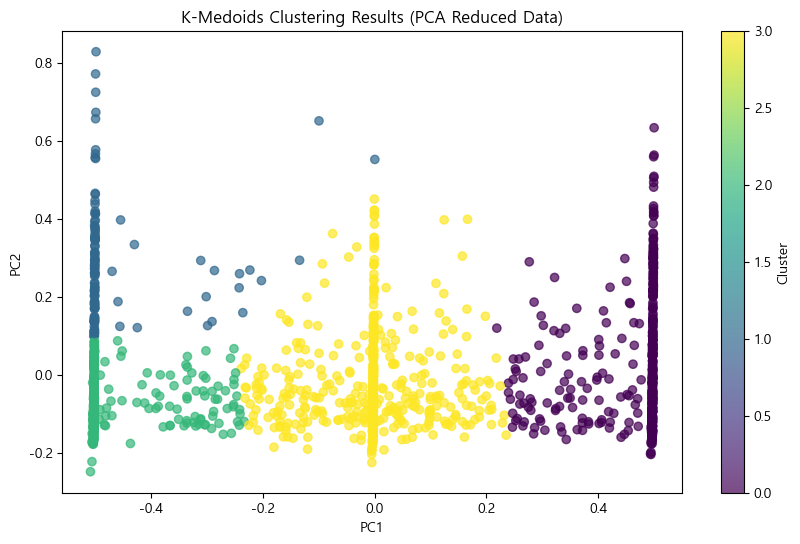

Overall Average Silhouette Score: 0.579
Cluster 0.0: Average Silhouette Score = 0.591
Cluster 1.0: Average Silhouette Score = 0.418
Cluster 2.0: Average Silhouette Score = 0.650
Cluster 3.0: Average Silhouette Score = 0.559


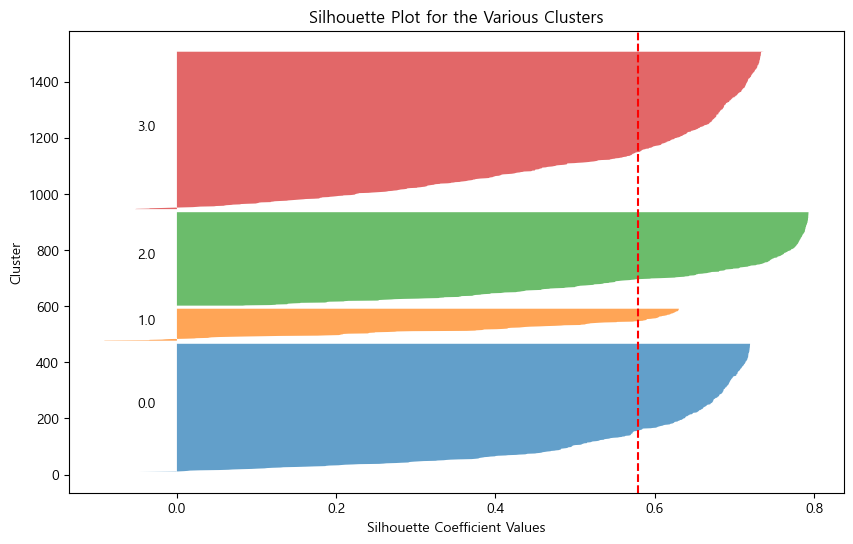


Cluster Summary (Feature Averages):
             ÌèâÍ∑†Ìï†Ïù∏Ïú®  Average_Unit_Price    Total_ÏàòÎüâ    Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®
Cluster                                                     
0.0      29.331807           39.321204  116.350109  0.685018
1.0      10.716951           94.566570   23.930435  0.482923
2.0      10.776741           20.802033  151.389222  0.803343
3.0      19.927024           31.149925  234.065836  0.712920


<Figure size 1400x800 with 0 Axes>

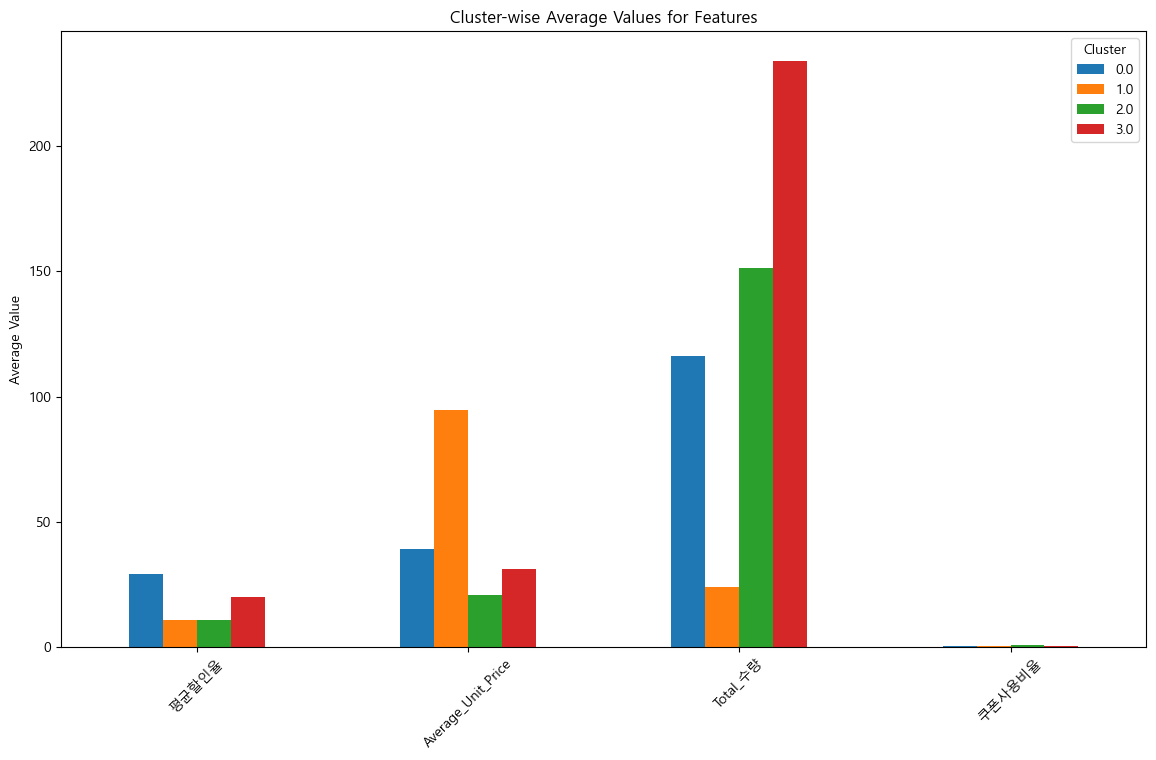

In [44]:
import pandas as pd
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows ÌôòÍ≤Ω)
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False  

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = r"C:\Users\Jimin\Desktop\project\ecommerce\Ï†ÑÏ≤òÎ¶¨\Customer_ÌååÏÉùÎ≥ÄÏàòÏ∂îÍ∞Ä"
df = pd.read_csv(file_path)

# 2. Ïà´ÏûêÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù
data = df[['ÌèâÍ∑†Ìï†Ïù∏Ïú®', 'Average_Unit_Price', 'Total_ÏàòÎüâ', 'Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®']]

# 3. Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (Min-Max Scaling)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 4. Ï∞®Ïõê Ï∂ïÏÜå (PCA)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# PCA Í≤∞Í≥º ÌôïÏù∏
print(f"Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}")

# 5. K-Medoids ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
# üí° `kmedoids`Îäî `n_clusters=4`Í∞Ä ÏïÑÎãàÎùº, Ï¥àÍ∏∞ Î©îÎèÑÏù¥Îìú Ïù∏Îç±Ïä§Î•º ÏßÅÏ†ë ÏßÄÏ†ïÌï¥Ïïº Ìï®
np.random.seed(42)  # ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï
initial_medoids = np.random.choice(len(data_pca), 4, replace=False)  # 4Í∞úÏùò Ï¥àÍ∏∞ Ï§ëÏã¨Ï†ê ÏÑ†ÌÉù

# K-Medoids Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
kmedoids_model = kmedoids(data_pca, initial_medoids)
kmedoids_model.process()

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ÄÏû•
clusters = kmedoids_model.get_clusters()
labels = np.zeros(len(data_pca))  # Í∏∞Î≥∏Í∞í 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
for cluster_idx, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = cluster_idx
df['Cluster'] = labels

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º ÌôïÏù∏
print("Cluster Sizes:")
print(df['Cluster'].value_counts())

# 6. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Medoids Clustering Results (PCA Reduced Data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 7. Ïã§Î£®Ïó£ Í≥ÑÏàò Í≥ÑÏÇ∞
if len(df['Cluster'].unique()) > 1:
    silhouette_avg = silhouette_score(data_pca, df['Cluster'])
    sample_silhouette_values = silhouette_samples(data_pca, df['Cluster'])
    print(f"Overall Average Silhouette Score: {silhouette_avg:.3f}")
    
    for cluster in np.unique(df['Cluster']):
        cluster_silhouette = sample_silhouette_values[df['Cluster'] == cluster]
        print(f"Cluster {cluster}: Average Silhouette Score = {np.mean(cluster_silhouette):.3f}")
    
    # Ïã§Î£®Ïó£ Í≥ÑÏàò ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in np.unique(df['Cluster']):
        ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster'] == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title("Silhouette Plot for the Various Clusters")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.show()
else:
    print("Silhouette score cannot be calculated because the number of clusters is less than 2.")

# 8. Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
numeric_columns = data.columns  # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ïó¥ Ïù¥Î¶Ñ
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

print("\nCluster Summary (Feature Averages):")
print(cluster_summary)

# 9. Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†Í∞í ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
cluster_summary.T.plot(kind='bar', figsize=(14, 8))
plt.title('Cluster-wise Average Values for Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()


Explained Variance Ratio by PCA: [0.80958295 0.14241392]
Cluster Sizes:
Cluster
0    560
2    457
1    343
3    108
Name: count, dtype: int64


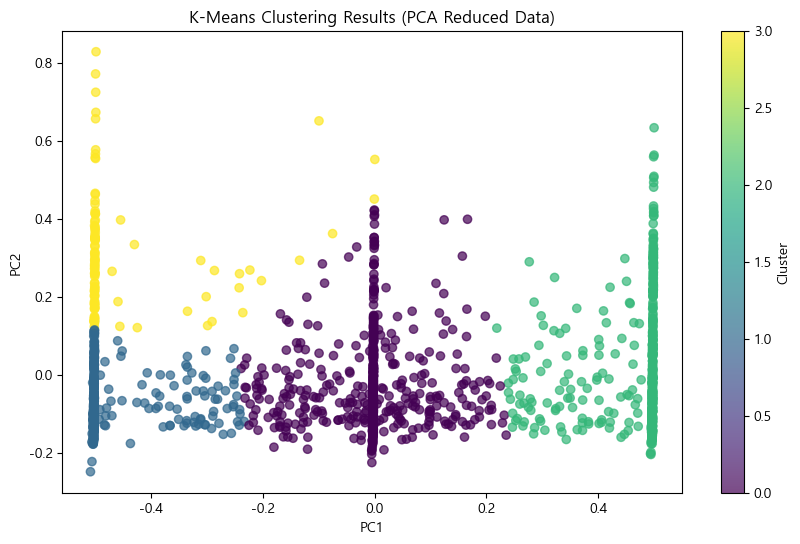

Overall Average Silhouette Score: 0.581
Cluster 0: Average Silhouette Score = 0.563
Cluster 1: Average Silhouette Score = 0.646
Cluster 2: Average Silhouette Score = 0.590
Cluster 3: Average Silhouette Score = 0.421


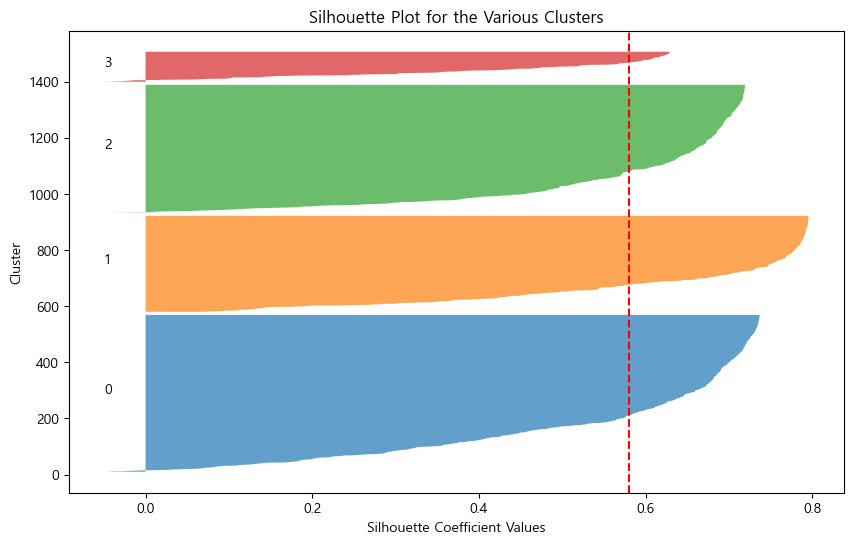


Cluster Summary (Feature Averages):
             ÌèâÍ∑†Ìï†Ïù∏Ïú®  Average_Unit_Price    Total_ÏàòÎüâ    Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®
Cluster                                                     
0        19.929409           30.827460  234.803571  0.712793
1        10.756360           21.778869  148.790087  0.801949
2        29.331807           39.321204  116.350109  0.685018
3        10.934888           98.108912   21.629630  0.465562


<Figure size 1400x800 with 0 Axes>

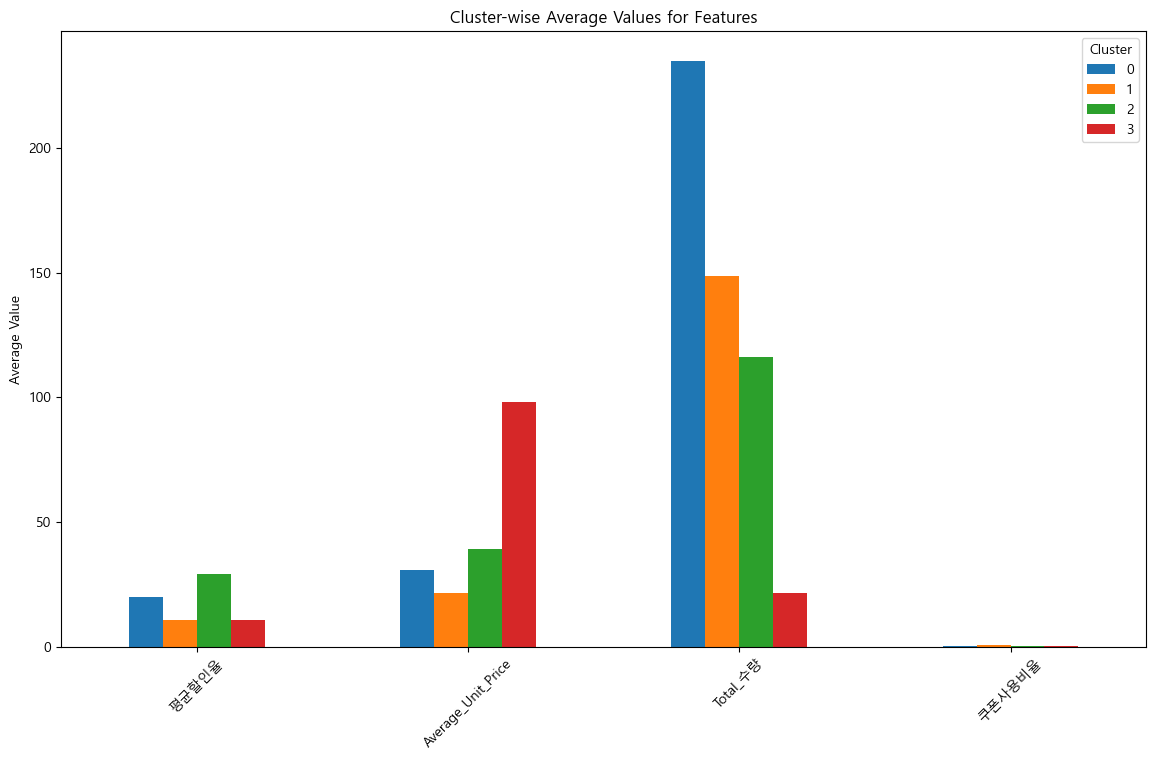

In [49]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm  
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï 
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['font.family'] = 'Malgun Gothic' 

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = r"C:\Users\Jimin\Desktop\project\ecommerce\Ï†ÑÏ≤òÎ¶¨\Customer_ÌååÏÉùÎ≥ÄÏàòÏ∂îÍ∞Ä"
df = pd.read_csv(file_path)

# 2. Ïà´ÏûêÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù
data = df[['ÌèâÍ∑†Ìï†Ïù∏Ïú®', 'Average_Unit_Price', 'Total_ÏàòÎüâ', 'Ïø†Ìè∞ÏÇ¨Ïö©ÎπÑÏú®']]

# 3. Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (Min-Max Scaling)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 4. Ï∞®Ïõê Ï∂ïÏÜå (PCA)
pca = PCA(n_components=2)  # 2DÎ°ú Ï∂ïÏÜå
data_pca = pca.fit_transform(data_scaled)

# PCA Í≤∞Í≥º ÌôïÏù∏
print(f"Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}")

# 5. K‚ÄëMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans_model = KMeans(n_clusters=4, random_state=42)  # ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎäî 4Î°ú ÏßÄÏ†ï
df['Cluster'] = kmeans_model.fit_predict(data_pca)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º ÌôïÏù∏
print("Cluster Sizes:")
print(df['Cluster'].value_counts())

# 6. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering Results (PCA Reduced Data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 7. Ïã§Î£®Ïó£ Í≥ÑÏàò Í≥ÑÏÇ∞
if len(df['Cluster'].unique()) > 1:
    silhouette_avg = silhouette_score(data_pca, df['Cluster'])
    sample_silhouette_values = silhouette_samples(data_pca, df['Cluster'])
    print(f"Overall Average Silhouette Score: {silhouette_avg:.3f}")
    
    for cluster in np.unique(df['Cluster']):
        cluster_silhouette = sample_silhouette_values[df['Cluster'] == cluster]
        print(f"Cluster {cluster}: Average Silhouette Score = {np.mean(cluster_silhouette):.3f}")
    
    # Ïã§Î£®Ïó£ Í≥ÑÏàò ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in np.unique(df['Cluster']):
        ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster'] == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title("Silhouette Plot for the Various Clusters")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.show()
else:
    print("Silhouette score cannot be calculated because the number of clusters is less than 2.")

# 8. Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
numeric_columns = data.columns  # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ïó¥ Ïù¥Î¶Ñ
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

print("\nCluster Summary (Feature Averages):")
print(cluster_summary)

# 9. Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†Í∞í ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
cluster_summary.T.plot(kind='bar', figsize=(14, 8))
plt.title('Cluster-wise Average Values for Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()


In [51]:
# K-Means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÍ∞Ä Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Í≥†Í∞ù Í∏∞Î≥∏Ï†ïÎ≥¥ ÌååÏùºÏóê Ï∂îÍ∞Ä
output_file = r"C:\Users\Jimin\Desktop\project\ecommerce\Ï†ÑÏ≤òÎ¶¨\Customer_ÌååÏÉùÎ≥ÄÏàòÏ∂îÍ∞Ä.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
